## Procesamiento de los datos de la Dictadura Militar (1976-1983) con Python
PyDay Santa Fe 2022
![IPython](image/pyday.sfe.png)

* Miembros:

Alex Mendoza, Martin Morales,  Lucas Domínguez, él/la que quiera sumarse


* Colaboraciones:

Yamila Manzur

Mayo 2022

In [37]:
print("=======================================================")
for i in range(3):
    print("30.000 compañeros detenenidos  desaparecidxs!")
    print("PRESENTES")
print("AHORA!")
print("Y SIEMPRE")
print("=======================================================")

30.000 compañeros detenenidos  desaparecidxs!
PRESENTES
30.000 compañeros detenenidos  desaparecidxs!
PRESENTES
30.000 compañeros detenenidos  desaparecidxs!
PRESENTES
AHORA!
Y SIEMPRE


## Sobre lo que le pensamos hablar ...
### 1- Sobre el Proyecto
#### 1.1- Sobre el origen y objetivos
#### 1.2- Fuentes de información
### 2- Metodología
#### 2.1-Entorno y paquetes empleados
#### 2.2-Tratamiento de la base de datos
#### 2.3-Producciones Gráficas
### 3- Conclusiones
### 4- Y ahora?


### Sobre el Proyecto

### El origen y objetivos
#### El curso: 'Curso de Introducción a Python Científico'
#### Objetivos
El Proyecto tiene como objetivo mostrar gráfica y didácticamente el cruce de diferentes variables acerca de las víctimas de la última dictadura cívico-eclesiástica-empresarial y militar del período comprendido entre los años 1976-1983. La intencionalidad es llegar a un público general y permitir dimensionar y comprender el aparato estatal represivo implementado para el exterminio de personas.
Una de las tareas que abordamos como equipo de trabajo fue enriquecer con más información el set de datos vigente, de esta manera se puede imprimir con mayor grado de detalle y a su vez dejar a la comunidad un mayor set de datos. Para llevar a cabo esto, se obtuvo información online de otras bases de datos públicas, la denominada  "Base de Datos del Parque de la Memoria-Monumento a las Víctimas del Terrorismo de Estado". El sitio web para la consulta de esta información está disponible en http://basededatos.parquedelamemoria.org.ar/registros/.
En esta base de datos de consulta pública online se encuentran más campos que los que brinda actualmente el R.U.V.T.E. Es por ello que a partir de artilugios de programación como el denominado "Scrapeo", se obtuvieron otros campos de informacion de los desaparecidos, permitiendo enriquecer la base de datos original.  

[Repositorio](https://gitlab.com/proyecto-v-ctimas-de-la-dictadura/mapeos)


# Fuentes de información
Bases de datos

[Registro Unificado de Víctimas del Terrorismo de Estado (RUVTE)](http://datos.jus.gob.ar/dataset/registro-unificado-de-victimas-del-terrorismo-de-estado-ruvte)

[Parque de la Memoria](http://basededatos.parquedelamemoria.org.ar/)


[Sitio de la Memoria](https://www.argentina.gob.ar/sitiosdememoria/ruvte/informe)


[Presentes. Diego Koz](https://github.com/DiegoKoz/presentes)

# 2. Metodología


### Entorno empleado
* [Jupyter](https://jupyter.org/)
    * Jupyter-notebook
### Paquetes empleados
* [Numpy](https://numpy.org/)
* [Pandas](https://pandas.pydata.org/)
* [Plotly](https://plotly.com/python/)
* [BeatifulSoup](https://pypi.org/project/beautifulsoup4/)
* [Geocoder](https://geocoder.readthedocs.io/)
* [RISE](https://rise.readthedocs.io/en/stable/index.html)

In [38]:
#Cargamos la base de datos en un dataframe:
import pandas as pd
import numpy as np
import geocoder
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

## Tratamiento de la base de datos
Se presenta a continuación el Registro unificado del listado de Víctimas del accionar represivo ilegal del Estado argentino entre 1976 y 1983 (víctimas de desaparición forzada y de asesinato) - RUVTE
Obtenido desde:
http://datos.jus.gob.ar/dataset/registro-unificado-de-victimas-del-terrorismo-de-estado-ruvte


Los datos que se trataran a continuación son un fragmento de la base de datos general que se presenta arriba con el solo fin de visualizar el procesamiento. Se destaca que para la visualizacion de los datos se trataran la totalidad de los mismo en otra plantilla .ipynb.

In [39]:
#!!!!!!!!!!!!!AGREGAR UBICACION DE TU COMPUTADORA!!!!!!!!!!!!!!!!!!!!
path ='/mnt/28768037768007B0/projects/victimas'

##Leemos la base de datos. OJO el archivo debe encontrarse en la misma ubicacion que este código
BD=pd.read_csv(path+"/mapeos/dataset_completos/datasets/BD_RUVTE2020_10registros.csv", encoding="ISO-8859-1",sep=",",na_values=[0])

#Imprimimos algunos parametros para visualización de datos. Longitud del número de registros existente
print('El número total de denuncias registradas en la base de datos actual es 8670')
print(f'El número total campos es {len(BD.columns)}')
print('El nombre de los campos presente en la base de datos actual:')
for col in BD.columns: 
    print(col)
BD.head()#Mostramos la Base de datos


El número total de denuncias registradas en la base de datos actual es 8670
El número total campos es 18
El nombre de los campos presente en la base de datos actual:
anio_denuncia
tipificacion_ruvte
id_unico_ruvte
apellido_paterno_nombres
apellido_materno
apellido_casada
edad_al_momento_del_hecho
documentos
anio_nacimiento
provincia_nacimiento
pais_nacimiento
nacionalidad
embarazo
fecha_lugar_detencion_secuestro
fecha_lugar_asesinato_o_hallazgo_de_restos
fotografia
provincia_nacimiento_indec_id
pais_nacimiento_indec_id


anio_denuncia    tipificacion_ruvte id_unico_ruvte  \
0           1984  DESAPARICION FORZADA        ID 5389   
1           1984  DESAPARICION FORZADA          ID 87   
2           1984  DESAPARICION FORZADA       ID 11788   
3           1984             ASESINATO        ID 9907   
4           1984  DESAPARICION FORZADA          ID 89   

      apellido_paterno_nombres apellido_materno apellido_casada  \
0        ABACHIAN  JUAN CARLOS       BEDROSSIAN             NaN   
1           ABAD  ANA CATALINA         SCARLATA         PERUCCA   
2          ABAD  JULIO RICARDO          CORONEL             NaN   
3          ABAD  OSCAR GERARDO           DOMATO             NaN   
4  ABAD  ROBERTO RODOLFO TOMAS           ZABALA             NaN   

  edad_al_momento_del_hecho    documentos  anio_nacimiento  \
0                   26 años    LE 8293245             1950   
1                   24 años   LC 10048122             1951   
2                   21 años  DNI 10283544             1954   
3                   25 años  DNI 10353245             1951   
4                   23 años  DNI 10650064             1953   

  provincia_nacimiento pais_nacimiento nacionalidad  embarazo  \
0         BUENOS AIRES       ARGENTINA    ARGENTINA       NaN   
1              MENDOZA       ARGENTINA    ARGENTINA       NaN   
2              TUCUMAN       ARGENTINA    ARGENTINA       NaN   
3         BUENOS AIRES       ARGENTINA    ARGENTINA       NaN   
4      CAPITAL FEDERAL       ARGENTINA    ARGENTINA       NaN   

                     fecha_lugar_detencion_secuestro  \
0                26/12/1976   LA PLATA  BUENOS AIRES   
1             15/08/1976   CORDOBA  CAPITAL  CORDOBA   
2                         NOV/1976   CAPITAL FEDERAL   
3                08/10/1976   LA PLATA  BUENOS AIRES   
4  09/08/1976   FLORIDA  VICENTE LOPEZ  BUENOS AIRES   

          fecha_lugar_asesinato_o_hallazgo_de_restos fotografia  \
0                                                ---         Sí   
1                                                ---         Sí   
2                                                ---         No   
3  21/10/1976   GRAL. MANSILLA (BARTOLOME BAVIO) ...         No   
4                                                ---         Sí   

   provincia_nacimiento_indec_id pais_nacimiento_indec_id  
0                            6.0                      ARG  
1                           50.0                      ARG  
2                           90.0                      ARG  
3                            6.0                      ARG  
4                            2.0                      ARG

### Incorporación de las url-foto
Uno de los primeros campos que se incorporaron a la base de datos existente (RUVTE) fue la ruta url de la fotografía de cada víctima. Esta información se encuentra en la base de datos del Parque de la Memoria, para cada unx de lxs desaparecidxs. Esto se realizó haciendo "SCRAPEO" o raspado de la web, es decir una busqueda en una dirección web determinada de algunos parametros dentro de esta. Se usó la bibloteca Beautiful Soup, que brinda funciones para extraer datos de archivos HTML y XML. 
De esta manera se realizó en primer lugar una examinación manual de la estructura html de la web http://basededatos.parquedelamemoria.org.ar/registros/2123/ y a partir de allí encontrar ciertas "etiquetas" con las cuáles parametrizar la captura de información que deaseamos.
La función de búsqueda de fotografía se puede resumir en los siguietnes pasos:
1. La funcion se inicia buscando en el campo fotografía de cada desaparecidxs, en el caso que sea afirmativa 'SI' extrae el nombre desde la columna de "apellido paterno y nombre" del RUVTE.
2. Con el dato del nombre y apellido busca una etiqueta img.
3. Captura el link en la fotografía en el caso que el la base de dato RUVTE.
4. Por ultimo se guarda en un campo nuevo del dataframe denominado "url-foto".

A continuación se presenta los códigos para la busqueda de persona y obtencion de URL-foto. 


In [40]:
def buscar_registro(apellidonombre):
    import requests
    from bs4 import BeautifulSoup
    foto=""
    url=""
    #asigno a web la url de busqueda con sus parámetros
    web="http://basededatos.parquedelamemoria.org.ar/buscador/?nombre_o_apellido=" 
    compuesto=web+apellidonombre #compone la url completa
    print(compuesto)
    try:
        respuesta=requests.get(compuesto, timeout=20) #pido la data
        sopa = BeautifulSoup(respuesta.text, 'html.parser')
        encontrar_tag=sopa.find_all(class_="row column twelve") #busco la etiqueta "row column twelve" porque ahi está el nro de registro 
        linea_registro=[tag["href"] for tag in encontrar_tag] #captura la linea donde esta el registro
        _,_,registro,_=linea_registro[0].split("/")#captura solo el valor del registro
        url="http://basededatos.parquedelamemoria.org.ar/registros/"+registro+"/" #armo la url para buscar la foto
        #foto=capturar_foto(url) #llamo a la funcion para bucar la foto y su link
    
    except requests.ConnectionError as e:
        print("OOPS!! Error en la Conexión. fijate si tenés Internet. detalles:\n")
        print(str(e))            
        
    except requests.Timeout as e:
        print("OOPS!! Se fue mucho tiempo!")
        print(str(e))
        
    except requests.RequestException as e:
        print("OOPS!! Error general")
        print(str(e))
        
    except KeyboardInterrupt:
        print("Algun programa cerró")

    except:
        print("no se encontró el nombre")   
    
    if fotop==1:
        return foto
        print(fotop)
    elif fotop==0:
        return url

In [41]:
## Función que busca en la web y captura el parámetro de foto y encuentra la dirección de la foto
def capturar_foto(sitio):
    """Ayuda: función que captura la url de la foto de una victima en la base de datos 
    del parque de memoria.
       Entrada:
       sitio:es un parámetro del estilo:
       http://basededatos.parquedelamemoria.org.ar/registros/2134/ 
       Salida: 
       fotourl: es la url completa de la foto
    """
    import requests
    from bs4 import BeautifulSoup
    fotourl="no hay fotos"
    try:
        respuesta = requests.get(sitio)
        soup = BeautifulSoup(respuesta.text, 'html.parser')

        img_tags = soup.find_all('img') #busco las etiquetas img
        for img in img_tags: #recorro las etiquetas y busco las que tengan jpg

            if "jpg" in img['src']:
                fotourl="http://basededatos.parquedelamemoria.org.ar"+img['src']
    except requests.ConnectionError as e:
        print("OOPS!! Error en la Conexión. fijate si tenés Internet. detalles:\n")
        print(str(e))            
        
    except requests.Timeout as e:
        print("OOPS!! Se fue muchoooooo tiempo!")
        print(str(e))
        
    except requests.RequestException as e:
        print("OOPS!! Error general")
        print(str(e))
        
    except KeyboardInterrupt:
        print("Algún programa cerró")
    
    except:
        print("No se encontró el nombre")
        
    return(fotourl)#devuelvo el url completo


### Incorporación de los campos Sexo, Ocupación, Estudios, Militancia y Víctimas simultáneas
Debido a la ausencia de ciertos campos de interes para el proyecto, se llevo a cabo un enriquecimiento incorporando los siguientes campos a la base de datos RUVTE:
- Sexo
- Ocupaciones
- Estudios
- Militancia
- Víctimas simultaneas

Dichos campos se encuentran en la web http://basededatos.parquedelamemoria.org.ar/ y fue necesario nuevamente realizar un SCRAPEO de esas variables para completar la bse de datos inicial (RUVTE). La estructura de dicha función es similar a la función para obtener las url de las fotografías de cada víctima, sólo que busca otras "etiquetas" y toma los datos en un contenedor tipo "diccionario", estructurado en "claves" y "valores". Esta función llevó más de 15 hs de trabajo, con mucha pruebas y errores, y estuvo a punto de ser descartada. Aún así, y luego de mucha insistencia, se concretó y es una de las funciones centrales, ya que enriquece enormemente la base datos con la cuál cruzamos datos y graficamos. 

In [42]:
#Función para obtener el dato de los campos de Sexo, Militancia, Ocupación y Víctimas simultaneas
def obtenerdatos(url):
    import requests 
    from bs4 import BeautifulSoup
    diccionario=""
    #sitio="http://basededatos.parquedelamemoria.org.ar/registros/2147/"
    try:
        respuesta = requests.get(url)
        print(respuesta)
        sopa = BeautifulSoup(respuesta.text, 'html.parser')
        valores=[]
        claves=[]
        entradasvalores = sopa.find_all('div', {'class': 'column eight'})
        entradasclaves = sopa.find_all('div', {'class': 'column four label'})
        for i, entrada in enumerate(entradasvalores):
            valor=entrada.text
            valores.append(valor)

        for i, entrada in enumerate(entradasclaves):
            clave=entrada.text
            claves.append(clave)
        diccionario={}

        for val, clav in zip(valores, claves):
            diccionario[clav]=val
    except requests.ConnectionError as e:
        print("OOPS!! Error en la Conexión. fijate si tenés Internet. detalles:\n")
        print(str(e))            
        
    except requests.Timeout as e:
        print("OOPS!! Se fue mucho tiempo!")
        print(str(e))
        
    except requests.RequestException as e:
        print("OOPS!! Error general")
        print(str(e))

    except:
        print("No se encontró el nombre")
    
    return diccionario

In [43]:
#Función que llama a buscar_registro, obtenerdatos, capturando la dirección de la foto (capturar_foto). 
#Ademas se incorporan los datos de campos adicionales a la base dato inicial (Sexo, Ocupación, Estudios, Militancia, 
#Victimas Simultáneas).

#Creamos los campos en la base de datos
BD["url-foto"]=""
BD["Sexo"]=""
BD["Ocupaciones"]=""
BD["Estudios"]=""
BD["Militancia"]=""
BD["Victimas simultaneas"]=""

In [44]:
cont=0
#Iniciamos el bucle que busca por apellido a cada uno de los registros y llama a las funciones de buscar_registro y obtenerdatos
for i in range(len(BD)): #Iniciamos el bucle que recorre todas las filas 
    #busco el registro de ese nombre en la web del parque de la memoria
    nombre=BD["apellido_paterno_nombres"].iloc[cont]
    fotop=0#variable bandera para la funcion buscar registro
    registrourl=buscar_registro(nombre)
    print (cont, "--", nombre)
    diccionario_datos=obtenerdatos(registrourl)
    print (diccionario_datos)
    # agrego al dataframe el nuevo dato en la fila y columna
    if diccionario_datos !="":    #controlo que no esté vacío el diccionario
        if "Sexo" in diccionario_datos:#controlo que este la clave en el diccionario
            BD.at[cont, "Sexo"]=diccionario_datos["Sexo"]#guardo los valores en el dataframe
           
        if "Ocupaciones" in diccionario_datos:
            BD.at[cont, "Ocupaciones"]=diccionario_datos["Ocupaciones"]
            
        if "Estudios" in diccionario_datos:
            BD.at[cont, "Estudios"]=diccionario_datos["Estudios"]
            
        if "Militancia " in diccionario_datos: 
            a=diccionario_datos["Militancia "]
            #print ("a",type(a), a, len (a))
            f=a.replace("+","")
            f=f.replace("(","")
            f=f.replace(")","") # borro parentesis si es que hay
            f=f.strip()#borro espacios a izquierda y drecha    
            # cambio el tipo de datos de la columna militancia a object porque sino espera un float64 ¿?
            BD["Militancia"] = BD["Militancia"].astype('object')
            BD.at[cont, "Militancia"]=f
            
        if "Víctimas simultáneas" in diccionario_datos:
            BD.at[cont, "Victimas simultaneas"]=diccionario_datos["Víctimas simultáneas"]
    
    if "S" in str(BD['fotografia'].iloc[cont]):#valido que en el campo fotografia diga "si"
        #busco la foto de ese nombre
        fotop=1
        urlfoto=capturar_foto(registrourl)
        #agrego al dataframe el nuevo dato en la fila y columna
        BD.at[cont, "url-foto"]=urlfoto
        print(urlfoto)
    cont=cont+1
    #limpieza final  de los nuevos campos creados e incorporados   
    BD['Ocupaciones'].replace(r'\s+|\\n', ' ', regex=True, inplace=True) 
    BD['Estudios'].replace(r'\s+|\\n', ' ', regex=True, inplace=True) 
    BD['Militancia'].replace(r'\s+|\\n', ' ', regex=True, inplace=True) 
    BD['Victimas simultaneas'].replace(r'\s+|\\n', ' ', regex=True, inplace=True) 
    
    #Incorporamos con nan las celdas vacías
    BD.replace(["---",""," "], np.nan, inplace=True)

http://basededatos.parquedelamemoria.org.ar/buscador/?nombre_o_apellido=ABACHIAN  JUAN CARLOS
0 -- ABACHIAN  JUAN CARLOS
<Response [200]>
{'Estado': 'Detenido/a desaparecido/a', 'Fecha de secuestro': '26/12/1976', 'Lugar de secuestro': 'LA PLATA. BS. AS.', 'Nombre': 'Juan Carlos Abachian Bedrossian ', 'Edad': '26', 'Sexo': 'Masculino', 'Fecha de nacimiento': '01/09/1950', 'Lugar de nacimiento': 'Mar Del Plata, Bs. As.', 'Nacionalidad': '\n\nArgentina\n\n', 'Apodos': 'Armenio', 'Estado civil': 'Soltero/a', 'Domicilios': '\n\nCalle 7 N° 579, La Plata\n\n', 'Ocupaciones': '\n\nEstudiante Universitario\nRugbier\n\n', 'Estudios': '\n\nUniversitario: UNLP, Derecho Derecho\n\n', 'Víctimas simultáneas': '\n\nNo hay información.\n\n'}
http://basededatos.parquedelamemoria.org.ar/media/fotos/ABACHIAN_JUAN_CARLOS_1.jpg
http://basededatos.parquedelamemoria.org.ar/buscador/?nombre_o_apellido=ABAD  ANA CATALINA
1 -- ABAD  ANA CATALINA
<Response [200]>
{'Estado': 'Detenido/a desaparecido/a', 'Fecha de

### Tratamiento del campo 'fecha_lugar_detencion_secuestro'
Cabe destacar el especial tratamiento que se hizo del campo 'fecha_lugar_detencion_secuestro'. Dicho campo se encuentra formado por la fecha y lugar en el formato DD/MM/AAAA LUGAR DE ASESINATO. Por un lado se extrajo el año y por otro el lugar donde se produjo al hecho. Este último dato, es importante para lograr geolocalizaciones, pero debe ser convertido a coordenadas.  Es en ese sentido se utilizó la libreria GeoCoder (https://geocoder.readthedocs.io/). GeoCoder facilita a los desarrolladores de Python a localizar las coordenadas de direcciones, ciudades, países y puntos de referencia en todo el mundo utilizando geocodificadores de terceros y otras fuentes de datos. Es decir uno le asigna una ubicación y el paquete devuelve la localizacion en coordenadas geograficas.

In [45]:
#Esta función toma el campo fecha_lugar_detencion_secuestro extrae el año y lugar, luego pregunta en Geocoder las coordenadas del lugar.
#Por último genera tres campos nuevos a la base de datos Año, Latitud y Longitud

#Creamos los campos en la base de datos
BD.insert(14, "Anio_desaparicion_secuestro", "", True) 
BD.insert(15, "Latitud", "", True) 
BD.insert(16, "Longitud", "", True) 

#Partimos el campo. D2 es una variable temporal
D2=BD['fecha_lugar_detencion_secuestro'].str.split(n=1,expand=True)

#De la primera parte dividida extraemos el año
BD['Anio_desaparicion_secuestro'] = D2[0].str[-4:]

In [46]:
#Esta funcion encuentra las coordenadas usando la libreria GeoCoder, conociendo el nombre de la ciudad
latlong={} #creo un diccionario
i=0
try:
    for lugares in D2[1]:
        if not "nan" in str(lugares): #filtrado
            coordenadas=geocoder.osm(lugares +" ,Argentina", timeout=30)  #buscamos el lugar sumado al nombre del país
            if coordenadas.latlng is None :
                BD.at[i,"Latitud"]=1
                BD.at[i,"Longitud"]=1
            else: 
                latlong[i]=coordenadas.latlng #cargo en el diccionario
                # cargo la data de coordenadas en el dataframe
                # tuve que borrar en el campo 46 la cadena "(ex GRAL. SARMIENTO)"
                print (i,"--",lugares,":", latlong[i])
                BD.at[i,"Latitud"]=latlong[i][0]
                BD.at[i,"Longitud"]=latlong[i][1]       
        else:
           
            BD.at[i,"Latitud"]=0
            BD.at[i,"Longitud"]=0
        
        i=i+1

except IOError:
    pass

except:
    
    print("no se encontró el dato de geolocalización!")
    pass

0 -- LA PLATA  BUENOS AIRES : [-34.9206797, -57.9537638]
1 -- CORDOBA  CAPITAL  CORDOBA : [-31.4173391, -64.183319]
2 -- CAPITAL FEDERAL : [-34.6075682, -58.4370894]
3 -- LA PLATA  BUENOS AIRES : [-34.9206797, -57.9537638]
4 -- FLORIDA  VICENTE LOPEZ  BUENOS AIRES : [-34.5322058, -58.4937312]
5 -- SANTA LUCIA  MONTEROS  TUCUMAN : [-27.092564199999998, -65.53482941166544]
6 -- LA PLATA  BUENOS AIRES : [-34.9206797, -57.9537638]
7 -- CAPITAL FEDERAL : [-34.6075682, -58.4370894]
8 -- DEL VISO  PILAR  BUENOS AIRES : [-34.4497463, -58.802606]


## Base de datos enriquecida

In [48]:

print(f'El número total campos en base de datos enriquecida {len(BD.columns)}')
#Imprimimos algunos parametros para visualización de datos. Longitud del número de registros existente
print(f'El número total de denuncias registradas en la base de datos actual es 8670')
print(f'El número total campos es {len(BD.columns)}')
print('El nombre de los campos presente en la base de datos actual:')
for col in BD.columns: 
    print(col)
BD.head()#Mostramos la Base de datos

El número total campos en base de datos enriquecida 27
El número total de denuncias registradas en la base de datos actual es 8670
El número total campos es 27
El nombre de los campos presente en la base de datos actual:
anio_denuncia
tipificacion_ruvte
id_unico_ruvte
apellido_paterno_nombres
apellido_materno
apellido_casada
edad_al_momento_del_hecho
documentos
anio_nacimiento
provincia_nacimiento
pais_nacimiento
nacionalidad
embarazo
fecha_lugar_detencion_secuestro
Anio_desaparicion_secuestro
Latitud
Longitud
fecha_lugar_asesinato_o_hallazgo_de_restos
fotografia
provincia_nacimiento_indec_id
pais_nacimiento_indec_id
url-foto
Sexo
Ocupaciones
Estudios
Militancia
Victimas simultaneas


anio_denuncia    tipificacion_ruvte id_unico_ruvte  \
0           1984  DESAPARICION FORZADA        ID 5389   
1           1984  DESAPARICION FORZADA          ID 87   
2           1984  DESAPARICION FORZADA       ID 11788   
3           1984             ASESINATO        ID 9907   
4           1984  DESAPARICION FORZADA          ID 89   

      apellido_paterno_nombres apellido_materno apellido_casada  \
0        ABACHIAN  JUAN CARLOS       BEDROSSIAN             NaN   
1           ABAD  ANA CATALINA         SCARLATA         PERUCCA   
2          ABAD  JULIO RICARDO          CORONEL             NaN   
3          ABAD  OSCAR GERARDO           DOMATO             NaN   
4  ABAD  ROBERTO RODOLFO TOMAS           ZABALA             NaN   

  edad_al_momento_del_hecho    documentos  anio_nacimiento  \
0                   26 años    LE 8293245             1950   
1                   24 años   LC 10048122             1951   
2                   21 años  DNI 10283544             1954   
3                   25 años  DNI 10353245             1951   
4                   23 años  DNI 10650064             1953   

  provincia_nacimiento  ...  \
0         BUENOS AIRES  ...   
1              MENDOZA  ...   
2              TUCUMAN  ...   
3         BUENOS AIRES  ...   
4      CAPITAL FEDERAL  ...   

          fecha_lugar_asesinato_o_hallazgo_de_restos fotografia  \
0                                                NaN         Sí   
1                                                NaN         Sí   
2                                                NaN         No   
3  21/10/1976   GRAL. MANSILLA (BARTOLOME BAVIO) ...         No   
4                                                NaN         Sí   

   provincia_nacimiento_indec_id pais_nacimiento_indec_id  \
0                            6.0                      ARG   
1                           50.0                      ARG   
2                           90.0                      ARG   
3                            6.0                      ARG   
4                            2.0                      ARG   

                                            url-foto       Sexo  \
0  http://basededatos.parquedelamemoria.org.ar/me...  Masculino   
1  http://basededatos.parquedelamemoria.org.ar/me...   Femenino   
2                                                NaN  Masculino   
3                                                NaN  Masculino   
4  http://basededatos.parquedelamemoria.org.ar/me...  Masculino   

                                         Ocupaciones  \
0                  Estudiante Universitario Rugbier    
1       Lic. Cs. Políticas Estudiante Universitaria    
2                                                NaN   
3                   Atleta Estudiante Universitario    
4   Chofer, Artista Plástico en Fábrica Fargo Est...   

                                            Estudios  \
0              Universitario: UNLP, Derecho Derecho    
1   Universitario: Universidad Católica de Cba, A...   
2                                                NaN   
3            Universitario: UNLP, Medicina Medicina    
4                                    Universitario:    

                               Militancia   Victimas simultaneas  
0                                     NaN   No hay información.   
1                                     NaN   No hay información.   
2  Ejército Revolucionario del Pueblo ERP   No hay información.   
3                                     NaN   No hay información.   
4                                     NaN   No hay información.   

[5 rows x 27 columns]

## 3. Visualización

### Paquetes
* [Pandas](https://pandas.pydata.org/)
* [Plotly](https://plotly.com/python/)

In [49]:
#!!!!!!!!!!!!!AGREGAR UBICACION DE TU COMPUTADORA!!!!!!!!!!!!!!!!!!!!
path ='/mnt/28768037768007B0/projects/victimas'

#Cargamos la base de datos con todos los registros generada con el codigo previo
BD=pd.read_csv(path+"/mapeos/dataset_completos/datasets/BD_RUVTE2020Enriquecida.csv", sep=",")

#Cargamos la base de datos con la geolocalización de los centros clandestinos
centros = pd.read_csv(path+"/mapeos/dataset_completos/datasets/centros_clandestinos_detencion.csv", sep=",")


### Geolocalización de Centros Clandestinos de Detención, Tortura y Exterminio.
Este gráfico muestra la ubicación y dimensiona no solo en números la cantidad sino también la concentración de ciertos puntos del país,   los Centros Clandestinos de Detención, Tortura y Exterminio, también llamados CCDTyE —o CCDyE o CCD— por sus siglas. 
Los CCD eran establecimientos, principalmente policiales o militares, que pasaron a ser sede de actividades clandestinas y empleados por el aparato represivo del estado para alojar a las personas privadas ilegalmente de su libertad e interrogarlas, torturarlas y eventualmente asesinarlas. Los primeros CCD fueron instalados en 1975, antes del golpe militar. El primer CDD se instala en la «Escuelita» de Famaillá, Tucumán. “El Campito” es el primer CDD de la provincia de Buenos Aires. 
En 1976 llegaron a existir 610 Centros Clandestinos de Detención en la Argentina, pero muchos de ellos fueron temporarios y circunstanciales.
Más información :
- https://www.ecured.cu/Centro_clandestino_de_detenci%C3%B3n_(Argentina) 
- http://www.desaparecidos.org/arg/centros/

In [50]:
#Creammos grafica
#Bloque1: Tratamiento de dato
#Bloque2: Ploteo
fig = px.scatter_mapbox(centros, lat="lat", lon="lon", hover_name='denominacion', hover_data=['ubicacion', 'espacio_de_memoria', 'lugar_emplazamiento_propiedad'],
                        color_discrete_sequence=["red"], zoom=3, height=680, center=dict(lat=-41,lon=-62))
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"l":0,"b":0})
fig.update_layout(
    title={
        'text': "Mapa interactivo sobre los Centros Clandestinos de detención (1976-1983) <br>Fuente:Parque de la Memoria. http://basededatos.parquedelamemoria.org.ar</br>",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
#Mostramos la gráfica
fig.show()
#Guardamos la gráfica
#fig.write_html(file=path+'/mapeos/resultados_mapeos/3-3-3_Nacionalidad.html', include_plotlyjs="cdn", full_html=False)

### Lugar de secuestro, año y cantidad de casos.
Intentamos mostrar con un mapa interactivo los lugares de secuestro por año y la variación de la cantidad de estos, teniendo en cuenta que trabajamos con un número menor a los treinta mil, hay muchos casos con faltante de datos del lugar de su secuestro, pero vemos un abultado número de puntos concentrados en regiones geográficas específicas.
Cada punto, no es solo un punto,  fueron personas y de cada una de ellas hay una historia.
Primeramente tratamos los datos agrupandolos por lugar y a su vez en un segundo grupo de año. Ambos fueron contabilizados y de esta forma se pudo obtener la cantidad de victimas por año y lugar de secuestro o detención.

In [ ]:
#Tratamos la información agrupando los datos por latitud, longitud y año de desaparición
#Bloque 1
D2= BD.groupby(['Latitud','Longitud','Anio_desaparicion_secuestro']).count().reset_index() 
D2=D2.rename(columns={'anio_denuncia': 'Cantidad'})#Cambiamos el nombre del nuevo dateframe
D2=D2.iloc[:,0:4]#eliminamos el resto de columnas
D2.sort_values(by=['Anio_desaparicion_secuestro'], inplace=True,ascending=True)#ordenamos de manera ascendiente los años
#Eliminamos las filas en las cuales no pudo encontrar las coordenadas :(
D2_nodata = D2[ D2['Latitud'] ==1 ]
D2 = D2.drop(D2_nodata.index, axis=0)
D2=D2.drop([653,28,677,823])#elimina 4 celdas que no contienen años 

#Bloque 2
##Grafica en mapa
fig = px.scatter_mapbox(D2, lat="Latitud", lon="Longitud",  size="Cantidad", animation_frame="Anio_desaparicion_secuestro", #, range_color=[0,100],color="Cantidad",
                   size_max=70, zoom=3, height=680, center=dict(lat=-41,lon=-62), color_discrete_sequence=["Red"],opacity=0.3)#color_continuous_scale=px.colors.cyclical.IceFire,
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(
    title={
        'text': "Número de Asesinadxs Secuestradxs por Año y Lugar de desaparición",
        'y':0.12,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

#Escribe la figura en la carpeta
#fig.write_html(file=path+'/mapeos/resultados_mapeos/3-3-2_Desaparecidos.html', include_plotlyjs="cdn", full_html=False)


[Imagen Desaparecidxs](resultados_mapeos/3-3-2_Desaparecidos.html)

### Cantidad de asesinadxs por género.
Analizando estas cantidades, comprobamos que más del 70 % de las víctimas de la dictadura fueron hombres, igualmente se nota que un gran porcentaje de mujeres sufrieron la acción represiva, agravada por los delitos sexuales, vejaciones y violaciones, con el adicional de que en muchos casos estaban embarazadas en el momento del secuestro.

[Imagen Género](resultados_mapeos/3-3-4_Genero.html)

### Gráfica de barras de cantidad de desaparecidxs por provincia de nacimiento.
Resaltan en esta gráfica, que en su mayoría las víctimas del aparato Estatal represivo fueron de las provincia de Buenos Aires, Córdoba, Santa Fe y Tucumán. 

[Imagen Provincia](resultados_mapeos/3-3-6_Provincia.html)

### Cantidad de asesinadxs por Nacionalidad de la víctima.
Un gráfico que nos sorprendió ya que no esperábamos ver personas de tantos países diferentes. Los motivos quizás no lo sepamos o quizás si, capaz fueron víctimas por botines de guerra o capaz militaban contra la dictadura o simplemente fueron víctimas por antisemitismo, pero la gráfica demuestra la diversidad de víctimas de distintas nacionalidades, no quisimos dejar pasar.

[Imagen Nacionalidad](resultados_mapeos/3-3-3_Nacionalidad.html)

### Cantidad de asesinadxs por nivel de estudios.
Siguiendo la linea de oficios nos centramos en las víctimas que estudiaban y visualizar las variantes de estas ya que un gran número de estudiantes protagonizaron la resistencia contra el golpe militar, además de que las organizaciones populares armadas, estaban constituidas por una mayoría de estudiantes secundarios y universitarios.

[Imagen Estudios](resultados_mapeos/3-3-7_Estudios.html)

### Tratamiento del campo edad al momento de la desaparición.
La siguiente gráfica refleja el número de desaparecidos asesinados en correlación a la edad informada en los registros de la base de datos con la que contamos. Es notable el rango de edad entre los 15 y 30 años de las personas que mayoritariamente sufrieron las consecuencias mas siniestras de la dictadura genocida.

[Imagen Edad](resultados_mapeos/3-3-10_Edad.html)

### Cantidad de denuncias por Año.
Por último presentamos el número de denuncias realizadas por año, en donde se deja en claro una mayoría de denuncias al inicio de la democracia, con algunos picos en los años 90 y luego del 2001, quizás se correspondan con campañas y el fuerte trabajo de las organizaciones de Derechos Humanos que trabajan incanzablemente para que no haya Ni olvido ni perdón.

[Imagen Denuncias](resultados_mapeos/denuncias.html)

## [Sobre la página web](https://proyecto-v-ctimas-de-la-dictadura.gitlab.io/mapeos/index2.html)



# Algunas Conclusiones

Trabajar con el set de datos de las víctimas de la última dictadura militar - eclesial - cívica y empresarial de la Argentina, ha sido revelador y conmovedor. Fue un proceso de trabajo que en todo momento nos conmovía con los hallazgos de ciertos datos y sus cruces con otros. Cada producción que a priori parecía insignificante nos asombraba luego con sus resultados. 
Uno de los trabajos centrales que realizamos fue enriquecer la Base de Datos (RUVTE) cruzándola con otras fuentes de información, esto nos llevó a cierta complejidad en el procesamiento de los códigos que exigían buena conexión de internet y computadoras que estén a la altura. No tuvimos ni buena conexión ni buenas máquinas (unas notebook de dudosa procedencia y una netbook de conectar igualdad hicieron el trabajo, con conexiones de internet intermitentes y precarias).
Sabemos que lo que hemos realizado es continuación de muchos trabajos y esfuerzos de diferentes personas, colectivos y organizaciones y si hemos contribuido en algo, es muy pequeño. La intencionalidad ha sido generar producciones, que desde lo gráfico, muestre didácticamente la dimensión del aparato represivo y las implicancias en el exterminio de personas. 
Sostenemos que este trabajo es un primer y pequeño avance, que precisa de continuidad y de la incorporación de diferentes miradas, para enriquecer la comprensión de un período que marcó la historia del país y, en consecuencia, nuestro presente y futuro. El avance en la complejidad de los estudios históricos contribuye a lograr un, cada vez más real,"NUNCA MÁS"; objetivo al cual nos acercaremos en la medida en que cada cual asuma el compromiso social y ético que todes somos capaces de asumir desde cualquiera sea el rol que ocupemos en la sociedad.  


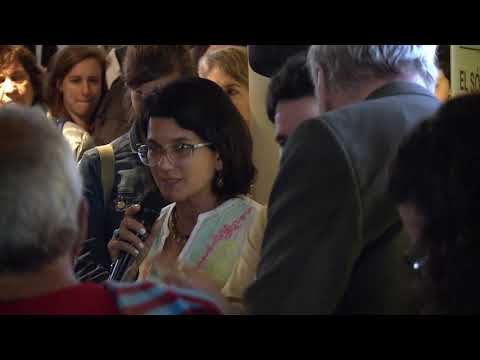

In [13]:
#Visualización video Horacio
from IPython.lib.display import YouTubeVideo
YouTubeVideo('HG2B5D5YloE')

## CHASGRACIAS!! 